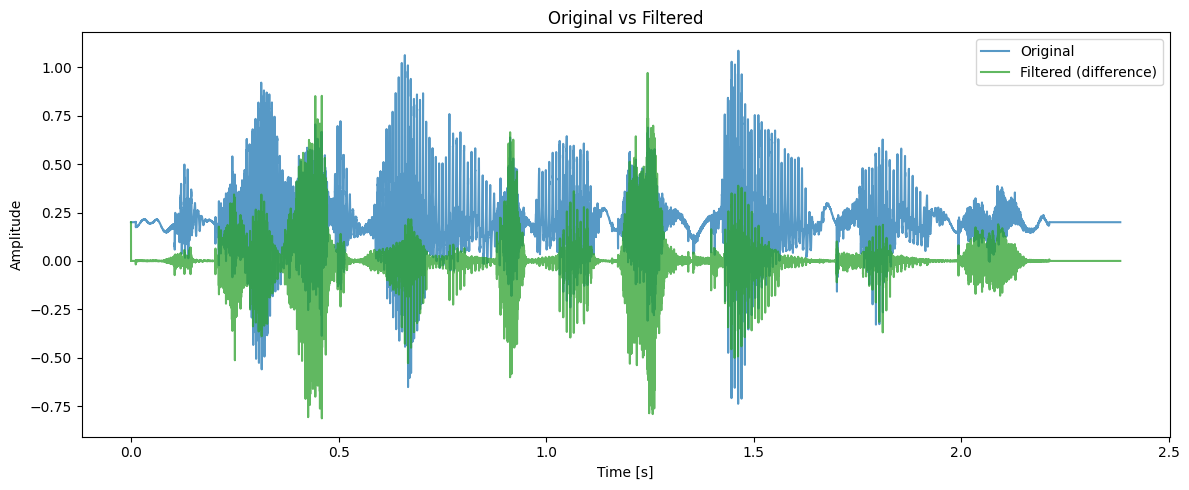

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import lfilter
from IPython.display import Audio, display

def pcm_to_float(audio_data_pcm):
  """Convert PCM audio data to float in [-1, 1]."""
  dtype = audio_data_pcm.dtype
  return audio_data_pcm.astype(np.float32) / np.iinfo(dtype).max

def float_to_pcm(audio_data, dtype=np.int16):
  """Convert float audio data in [-1, 1] to PCM format."""
  audio_data_pcm = np.clip(audio_data, -1.0, 1.0) * np.iinfo(dtype).max
  return audio_data_pcm.astype(dtype)

def apply_difference_filter(audio_data, fs):
  audio_data_shifted = np.roll(audio_data, 1)
  audio_data_shifted[0] = 0
  return audio_data_shifted - audio_data

fs, audio_data = wavfile.read('speech.wav')
t = np.arange(len(audio_data)) / fs
audio_data = pcm_to_float(audio_data)
audio_data += 0.2 # add offset for better visualization

audio_data_filt = lfilter([1, -1], [1], audio_data)

# Overlapped plot
def plot_overlapped_signals(t, audio_data, audio_data_filt, title, filtered_label):
  """Plot original and filtered signals overlapped."""
  ALPHA = 0.75 # add transparency between signals
  fig, ax = plt.subplots(figsize=(12, 5))
  ax.plot(t, audio_data, color='tab:blue', label='Original', alpha=ALPHA)
  ax.plot(t, audio_data_filt, color='tab:green', label=filtered_label, alpha=ALPHA)
  ax.set_title(title)
  ax.set_xlabel('Time [s]')
  ax.set_ylabel('Amplitude')
  ax.legend(loc='upper right')
  plt.tight_layout()
  plt.show()

plot_overlapped_signals(t, audio_data, audio_data_filt, 'Original vs Filtered', 'Filtered (difference)')

#print('Audio: original')
display(Audio(float_to_pcm(audio_data), rate=fs))
# Uncomment below to play filtered output
display(Audio(audio_data_filt, rate=fs))


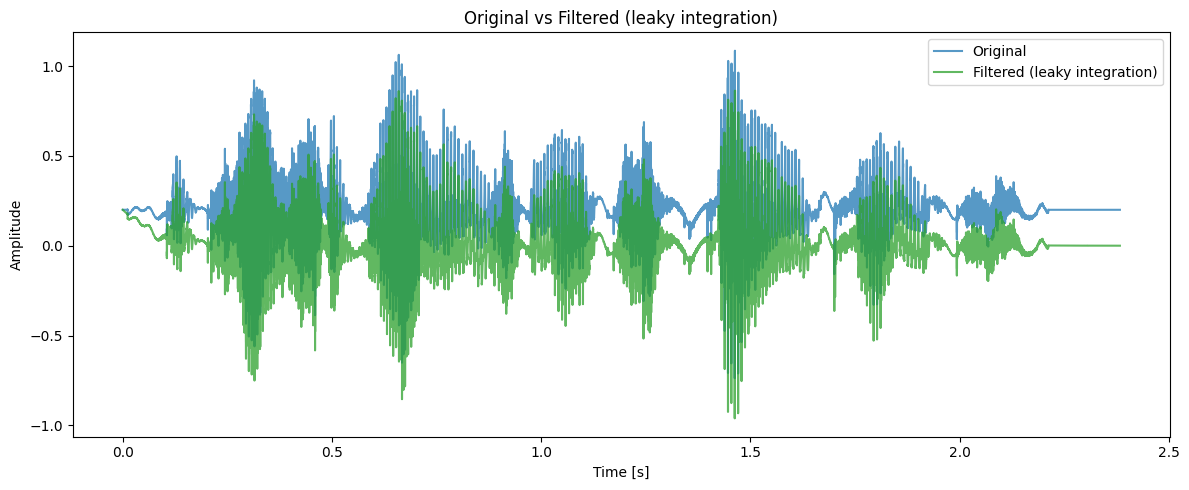

In [25]:
audio_data_filt = lfilter([1, -1], [1, -0.9993], audio_data)
plot_overlapped_signals(t, audio_data, audio_data_filt, 'Original vs Filtered (leaky integration)', 'Filtered (leaky integration)')
display(Audio(audio_data_filt, rate=fs))

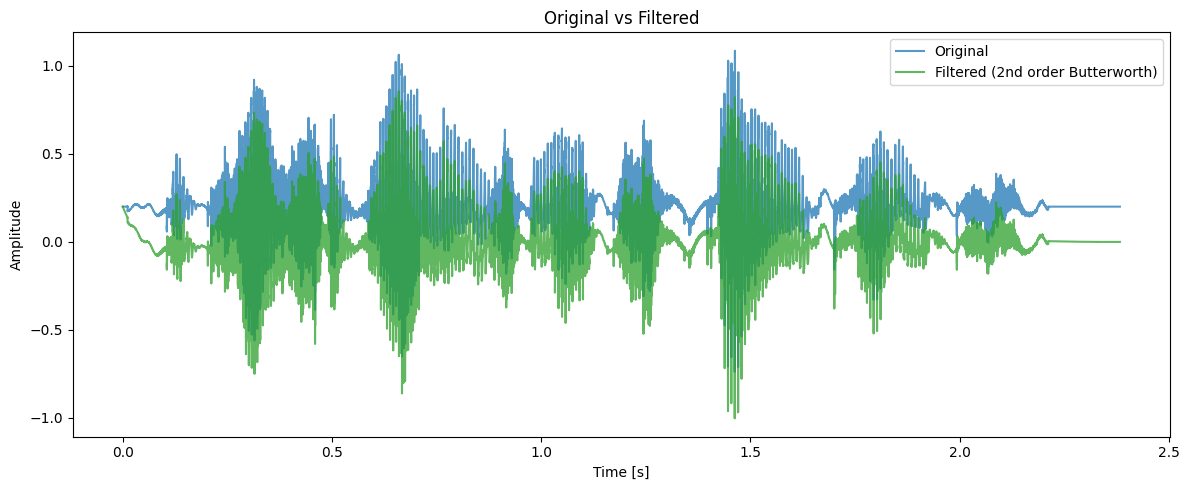

In [24]:
audio_data_filt = lfilter([0.99907483, -1.99814966,  0.99907483],[1, -1.9981488, 0.99815051], audio_data)
plot_overlapped_signals(t, audio_data, audio_data_filt, 'Original vs Filtered', 'Filtered (2nd order Butterworth)')
display(Audio(audio_data_filt, rate=fs))